# OSMSatLab Interactive Testing

This notebook allows you to interactively test the functionality of the `osmsatlab` package.

In [1]:
import os
import sys

# Ensure the src directory is available if running from examples/
# Note: If installed via 'poetry install' in editable mode, this might not be strictly necessary,
# but it helps if running the notebook standalone without the environment active in a specific way.
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

import geopandas as gpd
from shapely.geometry import Polygon
from osmsatlab.io.osm import download_osm_data

print("Imports successful!")

Imports successful!


c:\Users\darey\AppData\Local\pypoetry\Cache\virtualenvs\osmsatlab-uWzLvEYP-py3.11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Test Download by Bounding Box

Define a bounding box `(west, south, east, north)`.

In [2]:
# University of Twente area
bbox = (6.8480, 52.2450, 6.8520, 52.2480)
bbox_usaquen = (-74.0870, 4.6760, -73.9970, 4.8360)
print(f"Downloading data for bbox: {bbox_usaquen}...")
gdf_bbox = download_osm_data(bbox=bbox_usaquen)

print(f"Downloaded {len(gdf_bbox)} features.")
gdf_bbox.head()

Downloaded 17482 features.


geometry    building                name  \
element id                                                                      
node    267583546    POINT (-74.03898 4.6797)         yes     Torre Santander   
        374448575   POINT (-74.04507 4.72983)         yes            Soko 147   
        504805822   POINT (-74.04541 4.73673)         yes                 NaN   
        1640752845  POINT (-74.03491 4.70988)  apartments  Caminos del Contry   
        1932935213  POINT (-74.03741 4.71887)         yes                 NaN   

                   cuisine addr:housename addr:housenumber addr:street  \
element id                                                               
node    267583546      NaN            NaN              NaN         NaN   
        374448575   burger            NaN              NaN         NaN   
        504805822      NaN            NaN              NaN         NaN   
        1640752845     NaN    Calle 131 A            9A 83         NaN   
        1932935213     NaN            NaN              NaN         NaN   

                   designation addr:city addr:postcode  ... name:el name:is  \
element id                                              ...                   
node    267583546          NaN       NaN           NaN  ...     NaN     NaN   
        374448575          NaN       NaN           NaN  ...     NaN     NaN   
        504805822          NaN       NaN           NaN  ...     NaN     NaN   
        1640752845         NaN       NaN           NaN  ...     NaN     NaN   
        1932935213         NaN       NaN           NaN  ...     NaN     NaN   

                   name:it name:pt name:ro wikipedia:en wikipedia:fr  \
element id                                                             
node    267583546      NaN     NaN     NaN          NaN          NaN   
        374448575      NaN     NaN     NaN          NaN          NaN   
        504805822      NaN     NaN     NaN          NaN          NaN   
        1640752845     NaN     NaN     NaN          NaN          NaN   
        1932935213     NaN     NaN     NaN          NaN          NaN   

                   wikipedia:is wikipedia:pt type  
element id                                         
node    267583546           NaN          NaN  NaN  
        374448575           NaN          NaN  NaN  
        504805822           NaN          NaN  NaN  
        1640752845          NaN          NaN  NaN  
        1932935213          NaN          NaN  NaN  

[5 rows x 232 columns]

## 2. Test Download by Custom Geometry (Shapely Polygon)

Create a Shapely Polygon and pass it to `download_osm_data`.

Downloaded 9 features.


<Axes: >

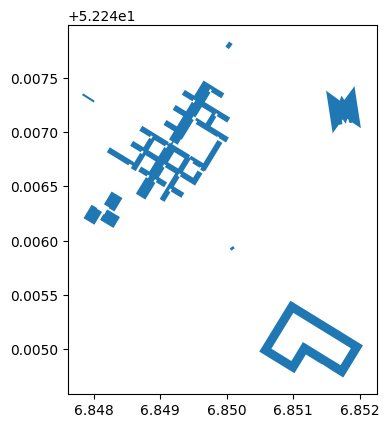

In [3]:
polygon_coords = [
    [6.8480, 52.2450],
    [6.8520, 52.2450],
    [6.8520, 52.2480],
    [6.8480, 52.2480],
    [6.8480, 52.2450]
]
poly = Polygon(polygon_coords)

print("Downloading data for custom polygon...")
gdf_poly = download_osm_data(custom_geometry=poly)

print(f"Downloaded {len(gdf_poly)} features.")
gdf_poly.plot()

## 3. Test Population Data (WorldPop)

Download population counts (100m resolution) for the same bounding box.

Fetching population data...


C:\Users\darey\OneDrive - University of Twente\Documents\osmsatlab\osmsatlab\src\osmsatlab\io\population.py:63: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersection['overlap_area'] = intersection.geometry.area


C:\Users\darey/.cache/osmsatlab/worldpop\col_ppp_2020_1km_Aggregated.tif
Downloaded 209 population points.
Total population: 2233015.25


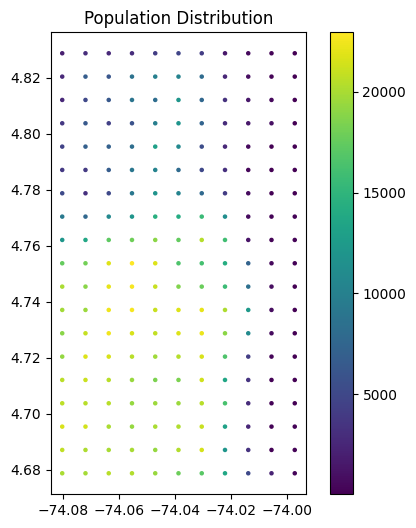

In [4]:
from osmsatlab.io import get_population_data
bbox_enschede = (6.7470, 52.1610, 7.0460, 52.3210)
bbox_bogota_residential = (-74.1255, 4.7195, -74.0825, 4.7565)
bbox_amsterdam_residential = (4.8855, 52.3445, 4.9185, 52.3645)
bbox_usaquen = (-74.0870, 4.6760, -73.9970, 4.8360)

# Using the same University of Twente area
# Note: The first run might take a while to download the country raster.
print("Fetching population data...")
try:
    gdf_pop = get_population_data(bbox=bbox_usaquen, year=2020)
    print(f"Downloaded {len(gdf_pop)} population points.")
    print(f"Total population: {gdf_pop['population'].sum():.2f}")
    
    if not gdf_pop.empty:
        # Simple plot
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots(figsize=(6, 6))
        gdf_pop.plot(column='population', ax=ax, legend=True, markersize=5)
        plt.title("Population Distribution")
        plt.show()
except Exception as e:
    print(f"Error: {e}")

<Axes: >

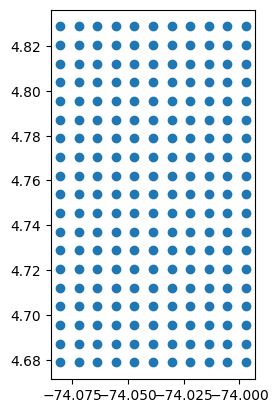

In [5]:
gdf_pop.plot()

In [11]:
from osmsatlab.core import OSMSatLab

#osm_lab_usaquen = OSMSatLab(bbox_usaquen)

osm_lab_bogota_residential = OSMSatLab(bbox_bogota_residential)

results = osm_lab_bogota_residential.calculate_accessibility_metrics(
    service_category="education_early", 
    threshold=1000
)
print('--------------------------------------------')
print(f"Coverage Ratio: {results['coverage_stats']['coverage_ratio']:.2%}")
print(f"People Covered: {results['coverage_stats']['covered_population']}")

results = osm_lab_bogota_residential.calculate_per_capita_metrics(service_category="education_early")
print('--------------------------------------------')
print(f"services_per_1000: {results['services_per_1000']}")
print(f"people_per_service: {results['people_per_service']}")

Loading population (2020):   0%|          | 0/1 [00:00<?, ?it/s]C:\Users\darey\OneDrive - University of Twente\Documents\osmsatlab\osmsatlab\src\osmsatlab\io\population.py:63: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersection['overlap_area'] = intersection.geometry.area
Loading population (2020): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]


C:\Users\darey/.cache/osmsatlab/worldpop\col_ppp_2020_1km_Aggregated.tif


Fetching services: 100%|██████████| 8/8 [00:00<00:00, 10.49it/s]

--------------------------------------------
Coverage Ratio: 62.19%
People Covered: 286604.5625
--------------------------------------------
services_per_1000: 0.045566000044345856
people_per_service: 21946.1875
